TEMA 3

SUB1

In [53]:
import matplotlib.pyplot as plt  # pentru grafice
import numpy as np  # pentru calcul algebric
from sklearn.linear_model import LinearRegression  # algoritmul principal de regresie
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # metrici de evaluare
from sklearn.preprocessing import PolynomialFeatures  # pentru diferitele grade polinomiale

In [55]:
fertilizer = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]).reshape(-1, 1)  # kg/hectar
randament = np.array([2.1, 2.8, 3.6, 4.5, 5.2, 5.8, 6.2, 6.4, 6.5, 6.4, 6.2, 5.9, 5.4, 4.8, 4.0])  # tone/ hectar

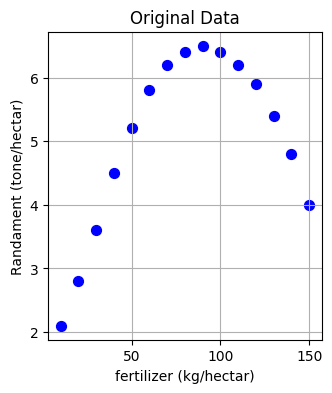

In [56]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(fertilizer, randament, color="blue", s=50)
plt.xlabel("fertilizer (kg/hectar)")
plt.ylabel("Randament (tone/hectar)")
plt.title("Original Data")
plt.grid(True)

In [68]:
degrees = [1, 2, 3, 4]  # vom calcula regresii polinomiale de ordinul 1, 2, 3 si 4
models = {}  
predictions = {} 

In [69]:
# pentru antrenarea și salvarea a câte un model de regresie pentru fiecare grad
def train_and_plot(degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(fertilizer)  # transformarea datelor de intrare (temperaturilor într-o formă adecvată funcției polinomiale)

    model = LinearRegression()  # încărcarea modelului
    model.fit(X_poly, randament)  # antrenarea modelului
    models[degree] = (poly, model)  # salvarea modelului

    y_pred = model.predict(X_poly)  # generarea predicțiilor
    predictions[degree] = y_pred  # salvarea predicțiilor

    # calcularea metricilor de evaluare
    mae = mean_absolute_error(randament, y_pred)
    mse = mean_squared_error(randament, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(randament, y_pred)

    # afișarea metricilor de evaluare
    print(f"\n=== Polynomial Degree {degree} ===")
    print(f"MAE:  {mae:.2f}")
    print(f"MSE:  {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²:   {r2:.4f}")

    # afișarea coeficienților și a termenului liber a funcției
    print(f"Coefficients: {model.coef_}")   
    print(f"Intercept: {model.intercept_:.2f}")

    # pregătirea intervalelor de afișare pentru grafic
    fertilizer_range = np.linspace(10, 150, 200).reshape(-1, 1)
    X_poly_range = poly.transform(fertilizer_range)
    y_range = model.predict(X_poly_range)

    # afișarea graficului funcției
    plt.subplot(1, 4, degree)
    plt.scatter(fertilizer, randament, color="blue", s=50, label="Data")
    plt.plot(fertilizer_range, y_range, color="red", linewidth=2, label=f"Degree {degree}")
    plt.xlabel("Fertilizer (kg/hectar)")
    plt.ylabel("Randament (tone/hectar)")
    plt.title(f"Degree {degree} (R²={r2:.4f})")
    plt.legend()
    plt.grid(True)


=== Polynomial Degree 1 ===
MAE:  1.02
MSE:  1.34
RMSE: 1.16
R²:   0.2593
Coefficients: [0.         0.01585714]
Intercept: 3.78


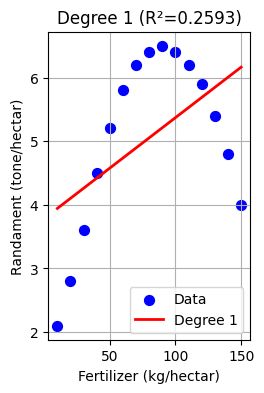

In [70]:
plt.figure(figsize=(12, 4))  # pentru afișarea corectă a graficului
train_and_plot(1)


=== Polynomial Degree 2 ===
MAE:  0.07
MSE:  0.01
RMSE: 0.10
R²:   0.9941
Coefficients: [ 0.          0.1271435  -0.00069554]
Intercept: 0.63


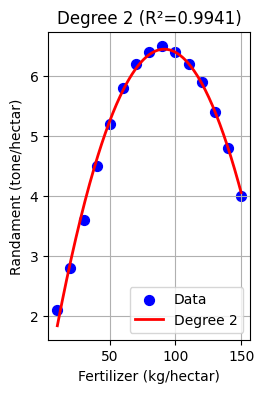

In [71]:
plt.figure(figsize=(12, 4))  # pentru afișarea corectă a graficului
train_and_plot(2)


=== Polynomial Degree 3 ===
MAE:  0.07
MSE:  0.01
RMSE: 0.09
R²:   0.9959
Coefficients: [ 0.00000000e+00  1.12591216e-01 -4.75328593e-04 -9.17546506e-07]
Intercept: 0.86


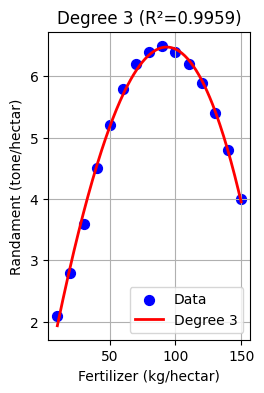

In [72]:
plt.figure(figsize=(12, 4))  # pentru afișarea corectă a graficului
train_and_plot(3)


=== Polynomial Degree 4 ===
MAE:  0.05
MSE:  0.00
RMSE: 0.06
R²:   0.9983
Coefficients: [ 0.00000000e+00  7.46243324e-02  5.14582299e-04 -1.03252699e-05
  2.93991355e-08]
Intercept: 1.25


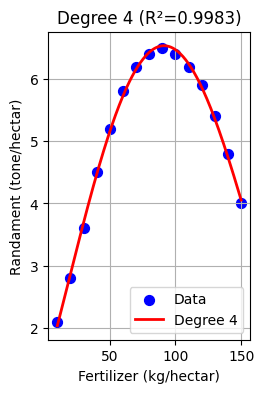

In [73]:
plt.figure(figsize=(12, 4))  # pentru afișarea corectă a graficului
train_and_plot(4)

SUB2

In [74]:
import matplotlib.pyplot as plt  # pentru grafice
import numpy as np  # pentru calcul algebric
from sklearn.linear_model import LinearRegression  # algoritmul de regresie liniară
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # metrici de evaluare

In [75]:
clients = np.array([50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]).reshape(-1, 1) # clients
sales = np.array([200, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600, 640])  # lei

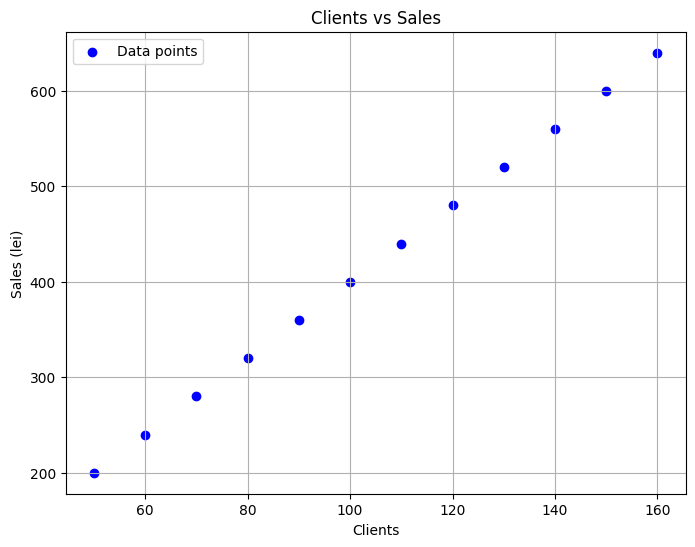

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(clients, sales, color='blue', label='Data points')
plt.xlabel('Clients')
plt.ylabel('Sales (lei)')
plt.title('Clients vs Sales')
plt.grid(True)
plt.legend()
plt.gca()
plt.show()

In [76]:
model = LinearRegression()
model.fit(clients, sales)  # antrenarea modelului

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [77]:
coef = model.coef_[0]
intercept = model.intercept_
print(f"Model Coefficients:")
print(f"  Coefficient: {coef:.2f}")
print(f"  Intercept: {intercept:.2f}")

Model Coefficients:
  Coefficient: 4.00
  Intercept: 0.00


SUB 2

In [31]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [23]:
age = np.array([25, 30, 35, 40, 45, 50, 52, 55, 58, 60, 62, 65, 68, 70, 72, 75, 78, 80]).reshape(-1, 1)  
colesterol = np.array([180, 190, 195, 200, 210, 220, 235, 240, 250, 255, 265, 270, 280, 285, 295, 300, 310, 320])  #mg/dL
boala = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

X = np.column_stack([age, colesterol])
y = boala

([<matplotlib.axis.YTick at 0x1fc3827af30>,
 [Text(0, 0, 'Nu'), Text(0, 1, 'Da')])

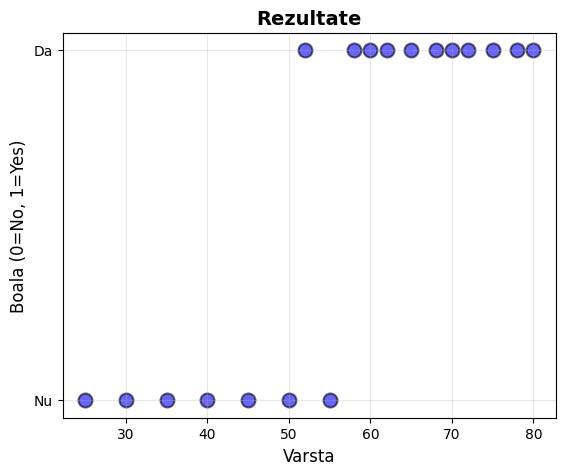

In [32]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.scatter(age, boala, color='blue', s=100, alpha=0.6, edgecolors='black', linewidths=1.5)
plt.xlabel('Varsta', fontsize=12)
plt.ylabel('Boala (0=No, 1=Yes)', fontsize=12)
plt.title('Rezultate', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.yticks([0, 1], ['Nu', 'Da'])

In [33]:
X_train = X[:14]
y_train = y[:14]

X_test = X[14:]
y_test = y[14:]

In [34]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [35]:
# Train metrics
train_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)

# Test metrics
test_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, test_pred))
print("\nClassification report:\n", classification_report(y_test, test_pred))


Train accuracy: 0.9285714285714286
Test accuracy: 1.0

Confusion Matrix:
 [[4]]

Classification report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



c:\Users\matia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


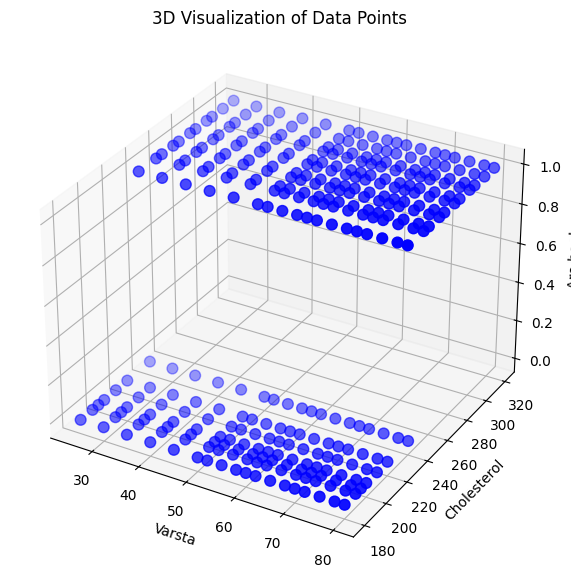

In [41]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(age, colesterol, boala, c='blue', s=60)
ax.set_xlabel("Varsta")
ax.set_ylabel("Cholesterol")
ax.set_zlabel("Are boala")

plt.title("3D Visualization of Data Points")
plt.show()


In [42]:
person = np.array([[55, 260]])
prob = model.predict_proba(person)[0][1]   # Probability of class 1

print("Probability of heart disease:", prob)


Probability of heart disease: 0.9993583762290619


SUB 3

In [1]:
import numpy as np
import pandas as pd  # pentru tabele de date (dataframes)
from sklearn.naive_bayes import CategoricalNB  # algoritmul de clasificare bazat pe formula Naive Bayes
from sklearn.preprocessing import LabelEncoder  # pentru transformarea datelor din forma de cuvinte în valori numerice
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [2]:
dataset = {
    "free":   [1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0],
    "money":  [1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
    "winner": [1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0],
    "link":   [1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0],
    "spam":   [1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0]
}

In [3]:
# Create DataFrame
df = pd.DataFrame(dataset)
print(df.head(10))
print(f"\nDataset shape: {df.shape}")


   free  money  winner  link  spam
0     1      1       1     1     1
1     1      0       0     0     1
2     1      1       1     1     1
3     0      1       1     0     0
4     1      0       0     0     0
5     1      0       1     1     1
6     0      0       0     0     0
7     0      0       0     0     0
8     1      1       1     0     1
9     1      1       1     1     1

Dataset shape: (20, 5)


In [4]:
# Manual probability calculations - P(Spam=Yes) and P(Spam=No)
X = df[['free', 'money', 'winner', 'link']]
y = df['spam']

total_samples = len(df)
spam_count = (y == 1).sum()
no_spam_count = (y == 0).sum()

p_spam = spam_count / total_samples
p_no_spam = no_spam_count / total_samples

print("=" * 50)
print("MANUAL PROBABILITY CALCULATIONS")
print("=" * 50)
print(f"P(Spam=Yes) = {spam_count}/{total_samples} = {p_spam:.4f}")
print(f"P(Spam=No)  = {no_spam_count}/{total_samples} = {p_no_spam:.4f}")


MANUAL PROBABILITY CALCULATIONS
P(Spam=Yes) = 12/20 = 0.6000
P(Spam=No)  = 8/20 = 0.4000


In [5]:
# Calculate conditional probabilities P(Free=1|Spam=Yes), P(Free=1|Spam=No), etc.
print("\n" + "=" * 50)
print("CONDITIONAL PROBABILITIES")
print("=" * 50)

features = ['free', 'money', 'winner', 'link']
for feature in features:
    spam_yes = df[df['spam'] == 1][feature].sum()
    spam_no = df[df['spam'] == 0][feature].sum()
    
    p_feature_spam_yes = spam_yes / spam_count if spam_count > 0 else 0
    p_feature_spam_no = spam_no / no_spam_count if no_spam_count > 0 else 0
    
    print(f"\nFeature: {feature}")
    print(f"  P({feature}=1 | Spam=Yes) = {spam_yes}/{spam_count} = {p_feature_spam_yes:.4f}")
    print(f"  P({feature}=1 | Spam=No)  = {spam_no}/{no_spam_count} = {p_feature_spam_no:.4f}")



CONDITIONAL PROBABILITIES

Feature: free
  P(free=1 | Spam=Yes) = 10/12 = 0.8333
  P(free=1 | Spam=No)  = 2/8 = 0.2500

Feature: money
  P(money=1 | Spam=Yes) = 7/12 = 0.5833
  P(money=1 | Spam=No)  = 1/8 = 0.1250

Feature: winner
  P(winner=1 | Spam=Yes) = 9/12 = 0.7500
  P(winner=1 | Spam=No)  = 3/8 = 0.3750

Feature: link
  P(link=1 | Spam=Yes) = 9/12 = 0.7500
  P(link=1 | Spam=No)  = 0/8 = 0.0000


In [6]:
# Train Naive Bayes model
model = CategoricalNB()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)
y_pred_proba = model.predict_proba(X)

print("\n" + "=" * 50)
print("MODEL TRAINING COMPLETE")
print("=" * 50)
print(f"Training accuracy: {accuracy_score(y, y_pred):.4f}")



MODEL TRAINING COMPLETE
Training accuracy: 0.9500


In [7]:
# Classify a new email: Free=Yes, Money=No, Winner=Yes, HasLink=Yes
new_email = np.array([[1, 0, 1, 1]])
prediction = model.predict(new_email)[0]
probabilities = model.predict_proba(new_email)[0]

print("\n" + "=" * 50)
print("CLASSIFICATION OF NEW EMAIL")
print("=" * 50)
print("Email attributes: Free=Yes, Money=No, Winner=Yes, HasLink=Yes")
print(f"Prediction: {'SPAM' if prediction == 1 else 'NOT SPAM'}")
print(f"P(Not Spam) = {probabilities[0]:.4f}")
print(f"P(Spam)     = {probabilities[1]:.4f}")



CLASSIFICATION OF NEW EMAIL
Email attributes: Free=Yes, Money=No, Winner=Yes, HasLink=Yes
Prediction: SPAM
P(Not Spam) = 0.0359
P(Spam)     = 0.9641


c:\Users\matia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
c:\Users\matia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(



EVALUATION METRICS
Confusion Matrix:
[[ 8  0]
 [ 1 11]]

Accuracy:  0.9500
Precision: 1.0000
Recall:    0.9167
F1-Score:  0.9565


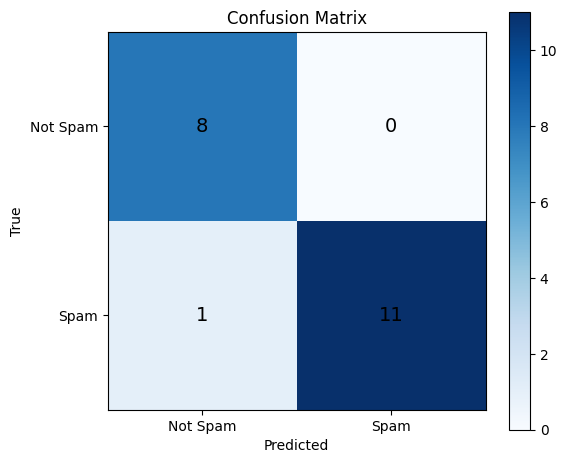

In [8]:
# Calculate confusion matrix and evaluation metrics
cm = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, zero_division=0)
recall = recall_score(y, y_pred, zero_division=0)
f1 = f1_score(y, y_pred, zero_division=0)

print("\n" + "=" * 50)
print("EVALUATION METRICS")
print("=" * 50)
print(f"Confusion Matrix:\n{cm}")
print(f"\nAccuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(cm, cmap='Blues')
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Not Spam', 'Spam'])
ax.set_yticklabels(['Not Spam', 'Spam'])

# Add text annotations
for i in range(2):
    for j in range(2):
        text = ax.text(j, i, cm[i, j], ha="center", va="center", color="black", fontsize=14)

plt.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()


In [9]:
# Apply Laplace smoothing and observe effects
model_laplace = CategoricalNB(alpha=1.0)  # alpha=1.0 enables Laplace smoothing
model_laplace.fit(X, y)

y_pred_laplace = model_laplace.predict(X)
accuracy_laplace = accuracy_score(y, y_pred_laplace)

print("\n" + "=" * 50)
print("LAPLACE SMOOTHING EFFECT")
print("=" * 50)
print(f"Accuracy without Laplace smoothing: {accuracy:.4f}")
print(f"Accuracy with Laplace smoothing:    {accuracy_laplace:.4f}")
print(f"Difference: {accuracy_laplace - accuracy:.4f}")

# Test on new email with Laplace smoothing
prediction_laplace = model_laplace.predict(new_email)[0]
probabilities_laplace = model_laplace.predict_proba(new_email)[0]

print(f"\nWith Laplace smoothing on new email:")
print(f"Prediction: {'SPAM' if prediction_laplace == 1 else 'NOT SPAM'}")
print(f"P(Not Spam) = {probabilities_laplace[0]:.4f}")
print(f"P(Spam)     = {probabilities_laplace[1]:.4f}")



LAPLACE SMOOTHING EFFECT
Accuracy without Laplace smoothing: 0.9500
Accuracy with Laplace smoothing:    0.9500
Difference: 0.0000

With Laplace smoothing on new email:
Prediction: SPAM
P(Not Spam) = 0.0359
P(Spam)     = 0.9641


c:\Users\matia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
c:\Users\matia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


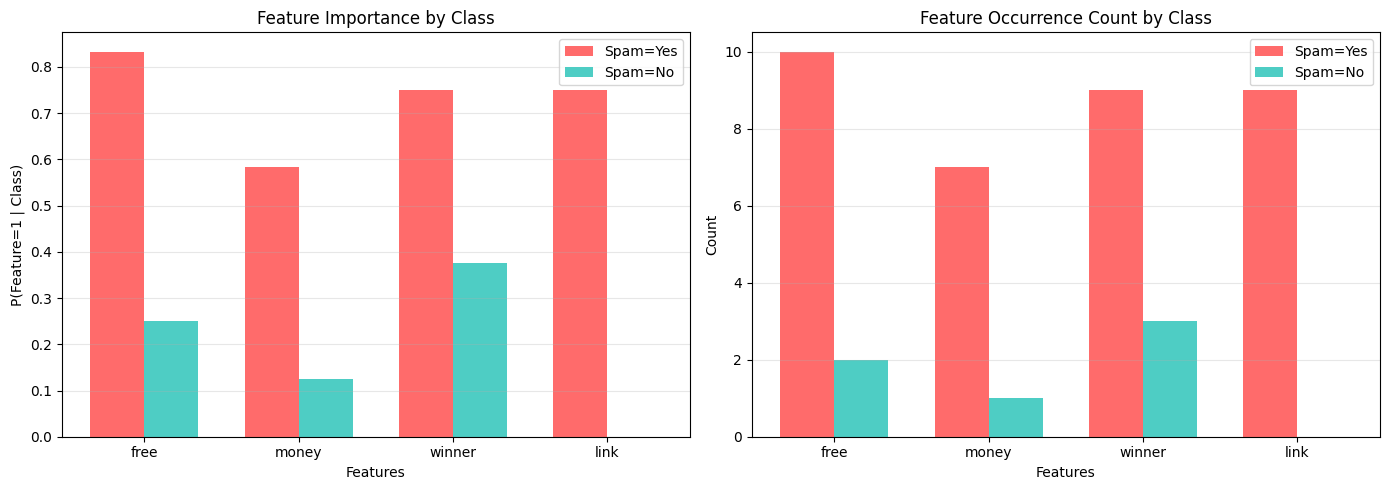


FEATURE IMPORTANCE SUMMARY
free: Spam=0.8333, Not Spam=0.2500
money: Spam=0.5833, Not Spam=0.1250
winner: Spam=0.7500, Not Spam=0.3750
link: Spam=0.7500, Not Spam=0.0000


In [10]:
# Visualize important characteristics (feature importance)
# Calculate feature importance based on conditional probabilities
feature_importance_spam = []
feature_importance_no_spam = []

for feature in features:
    spam_yes = df[df['spam'] == 1][feature].sum()
    spam_no = df[df['spam'] == 0][feature].sum()
    
    p_feature_spam_yes = spam_yes / spam_count if spam_count > 0 else 0
    p_feature_spam_no = spam_no / no_spam_count if no_spam_count > 0 else 0
    
    feature_importance_spam.append(p_feature_spam_yes)
    feature_importance_no_spam.append(p_feature_spam_no)

# Plot feature importance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

x = np.arange(len(features))
width = 0.35

axes[0].bar(x - width/2, feature_importance_spam, width, label='Spam=Yes', color='#ff6b6b')
axes[0].bar(x + width/2, feature_importance_no_spam, width, label='Spam=No', color='#4ecdc4')
axes[0].set_xlabel('Features')
axes[0].set_ylabel('P(Feature=1 | Class)')
axes[0].set_title('Feature Importance by Class')
axes[0].set_xticks(x)
axes[0].set_xticklabels(features)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Plot feature occurrence frequency
feature_counts_spam = [df[df['spam'] == 1][f].sum() for f in features]
feature_counts_no_spam = [df[df['spam'] == 0][f].sum() for f in features]

axes[1].bar(x - width/2, feature_counts_spam, width, label='Spam=Yes', color='#ff6b6b')
axes[1].bar(x + width/2, feature_counts_no_spam, width, label='Spam=No', color='#4ecdc4')
axes[1].set_xlabel('Features')
axes[1].set_ylabel('Count')
axes[1].set_title('Feature Occurrence Count by Class')
axes[1].set_xticks(x)
axes[1].set_xticklabels(features)
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 50)
print("FEATURE IMPORTANCE SUMMARY")
print("=" * 50)
for i, feature in enumerate(features):
    print(f"{feature}: Spam={feature_importance_spam[i]:.4f}, Not Spam={feature_importance_no_spam[i]:.4f}")
